<table style="width: 100%; border-style: none">
<tr style="border-style: none; background-color: #82a8cf">
<td style="border-style: none; width: 1%; text-align: left; font-size: 18px; color: #ffffff">Institut f&uuml;r Theoretische Physik<br /> <font color="#e6e6e6">Universit&auml;t zu K&ouml;ln </font></td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 18px; color: #ffffff">Prof. Dr. Simon Trebst<br /> <font color="#e6e6e6"> Christoph Berke </font> </td>
</tr>
</table>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h1 style="font-weight:200; text-align: center; margin: 0px; font-size: 48px; padding:0px; color: #606060">Computer-Physik </h1>
<h1 style="font-weight:light; text-align: center; margin: 10px; padding:0px; color: #606060">&Uuml;bungsblatt 7</h1>
<hr  style="height: 2px; border-color: #606060; background-color: #606060"> 
<h3 style="font-weight:400; text-align: center; margin: 0px; font-size: 20px; padding:0px; margin-bottom: 20px; color: #606060">Sommersemester 2023</h3>
<!--<h3 style="font-weight:bold; text-align: center; margin: 0px; font-size: 15px; padding:0px; margin-bottom: 20px;">Website: <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></h3> -->

<font size="4" color="#606060">**Website:** <a href="https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml" style="color:#82a8cf; text-decoration: underline;text-decoration-style: dotted;">https://www.thp.uni-koeln.de/trebst/Lectures/2023-CompPhys.shtml</a></font>

<font size="4" color="#606060">**Abgabe**: <span style="color:#82a8cf"> 15.5.2023, 12:00 Uhr </span> <span style="float:right;">**Besprechung**: 17.5.2023 - 19.5.2023.</span></font>

<font size="4" color="#606060">**Name**: <span style="color:#82a8cf"> Bitte geben Sie Ihren Namen an.  </span> </font>

<hr style="height:.3px"> 

<span style="color:#606060; font-weight:bold; font-size:20px"> Aufgaben auf Übungsblatt 7</span>
- <span style="color:#606060; font-weight:light; font-size:14px"> Aufgabe 16:  Die Zukunft richtig ausgependelt [10 Punkte] </span>
- <span style="color:#606060; font-weight:light; font-size:14px"> Aufgabe 17: Monde auf der Überholspur [10 Punkte]</span>
- <span style="color:#82a8cf; font-weight:bold; font-size:16px"> Aufgabe 18 (Bonus): Zelluläre Automaten in 2D [12 Bonus-Punkte] </span>

<hr style="height:.3px"> 

<table style="border-style: none; width: 100%; background-color: #FFFFFF"><tr style="border-style: none;">
<td style="border-style: none; width:1%; text-align: left; font-size: 25px; font-weight: 200;background-color: #FFFFFF">Aufgabe 18: Zelluläre Automaten in 2D </td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 15px;background-color: #FFFFFF">[12 Bonus-Punkte]</td></tr></table>

Mit dem Sierpinski-Dreieck und dem Nagel-Schreckenberg-Modell zur Verkehrssimulation haben Sie bereits zwei Beispiele für (eindimensionale) zelluläre Automaten kennengelernt, also Systeme die aus diskreten Zellen bestehen, deren Wert sich in jedem Zeitschritt nach bestimmten Regeln aktualisiert. In dieser Aufgabe betrachten wir die zeitlichen Entwicklung **zweidimensionaler zellulärer Automaten**, bei denen die diskreten Zellen in einem Quadratgitter angeordnet sind. Wie im eindimensionalen Fall wird der Wert jeder Zelle, ausgehend von ihrem eigenen Zustand und dem der umgebenen Zellen, in jedem Zeitschritt angepasst.

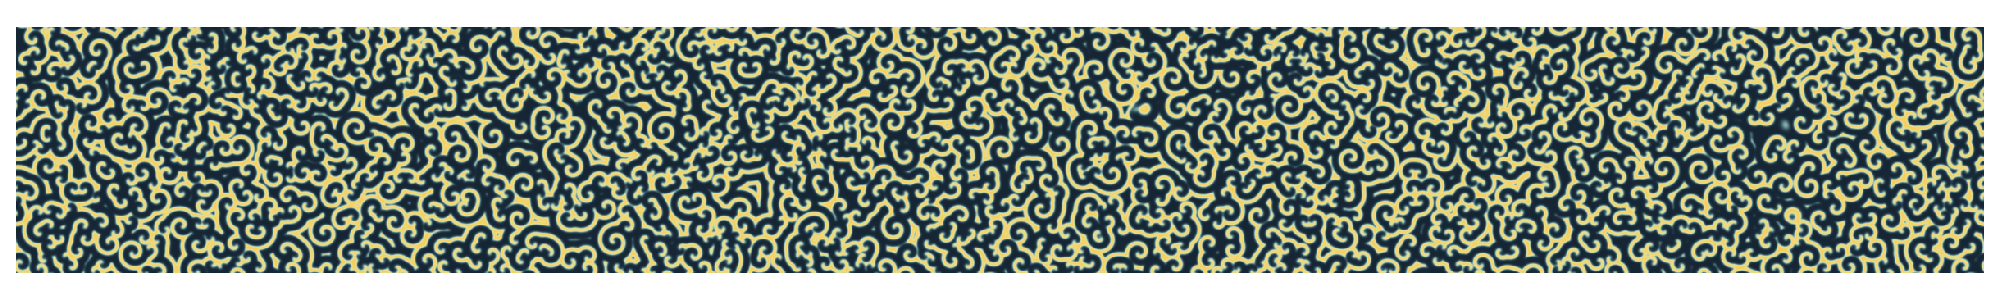

Wir betrachten zwei Beispiele: Einen sogenannten *chemischen zellulären Automaten*, sowie das populäre [Conway's Game of Life](https://de.wikipedia.org/wiki/Conways_Spiel_des_Lebens).
Die konkreten Regeln, nach denen diese Automaten funktionieren, werden unten ausführlich diskutiert.
Um Ihnen den Einstieg in diese Aufgabe zu erleichern, stellen wir Ihnen die nötigen Funktionen zur Seite, die die Automaten animieren (basierend auf der von Ihnen zu implementierenden Aktualisierungsvorschrift der Zustände).

In [ ]:
using GLMakie

In [ ]:
# Erzeugen der Figure
function generate_image(data)
    
    # Figure und Achsenumgebung
    fig = Figure(resolution = (1000,1000))
    ax = Axis(fig[1,1], aspect = DataAspect())
    
    # Darstellung des Arrays Data mit heatmap
    heatmap!(ax, data, colormap = :starrynight)
    
    # Optische Anpassungen
    hidedecorations!(ax)
    hidespines!(ax)

    # Anzeugen der Figure
    display(fig)
    
    return 
end

# Updaten der Figur
function update_image!(data)
    
    # Signal an Observable data senden
    # um auf Änderung aufmerksam zu machen.
    notify(data)
    
    # Pause für Animation
    sleep(0.005)
end

Bei beiden hier zu diskutierenden zellulären Automaten besteht ein Teil des Update-Schritts darin, für eine gegebene Zelle die Summe der Werte aller Nachbarzellen zu berechnen.
Um Ihnen den Einstieg in die Aufgabe zu erleichtern, stellen wir Ihnen hier eine Funktion `neighbors` bereit, die die Summe der Nachbarn um eine Stelle `i,j` in einem gegebenen Array unter Berücksichtigung von *periodischen Randbedingungen* berechnet.

In [ ]:
# Summe der Nachbarn um (i,j) im Array data berechnen
function neighbors(data, i, j)
    if i == size(data,1)
        ip1 = 1
        im1 = i-1
    elseif i == 1
        ip1 = i+1
        im1 = size(data,1)
    else
        ip1 = i+1      
        im1 = i-1 
    end
    if j == size(data,2)
        jp1 = 1
        jm1 = j-1
    elseif j == 1
        jp1 = j+1
        jm1 = size(data,2)
    else
        jp1 = j+1
        jm1 = j-1
    end
    return  data[ip1, j] +
            data[im1, j] +
            data[ip1, jp1] +
            data[im1, jp1] +
            data[ip1, jm1] +
            data[im1, jm1] +
            data[i, jp1] +
            data[i, jm1]
end

## a) Chemischer zellulärer Automat

Bei diesem ersten Beispiel wird jede Zelle durch drei Parameter $a, b, c \in [0, 1)$ beschrieben. Diese Parameter entsprechen den Konzentrationen dreier Chemikalien und das Aktualisieren der Werte beschreibt chemische Reaktionen zwischen den Substanzen. Zu Beginn werden die drei Konzentrationen zufällig aus dem möglichen Wertebereich gewählt.

Der zelluläre Automat funktioniert nun nach den folgenden Regeln:
* Für jede Zelle wird der durchschnittliche Wert $\overline{a}, \overline{b}, \overline{c}$ als Mittelwert der acht umgebenden Zellen sowie des Werts der Zelle selbst berechnet.
* Der neue Zustand ist dann gegeben durch

$\quad a = \min\left(1.0,\; \overline{a}\cdot\left(1. + \overline{b} - \overline{c}\right)\right)$,

$\quad b = \min\left(1.0,\; \overline{b}\cdot \left(1. + \overline{c} - \overline{a}\right)\right)$,

$\quad c = \min\left(1.0,\; \overline{c}\cdot \left(1. + \overline{a} - \overline{b}\right)\right)$.

Ihre Aufgabe ist es, das Programm-Skelett in den nachfolgenen Zellen zu vervollständigen und um das Update der Automaten-Zellen zu erweitern. Wie Sie erkennen können, wird der Automat bereits visualisiert indem eine der drei Konzentrationen dargestellt und in jedem Schritt aktualisiert wird. 

Es kann hilfreich sein, die oben definierte Funktion `neighbors` zu benutzen.
Beachten Sie, dass alle Zellen *gleichzeitig* in den neuen Zustand übergehen, d.h. die Berechnung der Mittelwerte darf ausschließlich mit den Werten des vorherigen Iterationsschritts passieren und nicht mit denen der schon partiell veränderten Matrix.


In [ ]:
# Systemgroesse
Lx = 200
Ly = 200

# Die Werte a,b,c des Automaten als 3 Arrays der Groesse Lx x Ly
automaton_a = rand(Lx, Ly)
automaton_b = rand(Lx, Ly)
automaton_c = rand(Lx, Ly)

# Arrays fuer die Mittelwerte
automaton_mean_a = zeros(Lx, Ly)
automaton_mean_b = zeros(Lx, Ly)
automaton_mean_c = zeros(Lx, Ly)

# Observable für die Animation mit Makie
# Wert der Observablen ist die Konzentration der Substanz a.
A = Observable(automaton_a)

# Erstes Darstellen des Bildes
generate_image(A)

# Fuehre die Update-Schritte aus
for step in 1:400
    
    ############################################
    # HIER SOLLTE IHR CODE STEHEN
    # Berechne die Mittelwerte    
    # Berechne die neuen Automatenzustaende
    ############################################

    # Aktualisiere das Bild
    update_image!(A)
end

## b) Conway's Game of Life

Jetzt betrachten wir den zellulären Automaten, der unter dem Namen [Conway's Game of Life](https://de.wikipedia.org/wiki/Conways_Spiel_des_Lebens) bekannt ist. Die Grundlage dieses Automaten sind erneut in einem Quadratgitter angeordnete Zellen. Diese können nur zwischen zwei Zuständen wechseln, die man als tot (`0`) und lebendig (`1`) bezeichnet.

Die Aktualisierung der Zellenkonfigurationen geschieht nach den folgenden Regeln:
- Eine Zelle mit weniger als 2 lebendigen Nachbarn ist sicher im nächsten Schritt tot.
- Eine tote Zelle mit exakt 3 lebendigen Nachbarn wird im nächsten Schritt geboren.
- Eine lebendige Zelle mit mehr als 3 lebendigen Nachbarn stirbt in der nächsten Generation an Überbevölkerung.

Ihre Aufgabe ist die Implementierung des Automaten basierend auf dem Code aus dem vorherigen Aufgabenteil. Testen Sie Ihre Implementierung mit einem zufällig besetztes Array als Startkonfiguration.

In [ ]:
# Systemgroesse
Lx = 200
Ly = 200

############################################
# HIER SOLLTE IHR CODE STEHEN
############################################

Wie Sie wahrscheinlich erkennen konnten, ist die Entwicklung der zufälligen Startkonfiguration sehr vielfältig. Es gibt kleine Strukturen und statisch erscheinende Cluster, sowie Elemente, die sich nach gewisser Zeit wieder reproduzieren (sogenannte Pulsare) oder ganz verschwinden. Die Menge an verschiedene Konfigurationen und Mustern ist gigantisch und kann im [Game of Life Wiki](http://www.conwaylife.com/wiki/Main_Page) nachgelesen werden. Wenn sie dort verschiedene Konfigurationen, wie die [Gosper Gleiterkanone](http://www.conwaylife.com/wiki/Gosper_glider_gun) o.Ä. betrachten, können Sie diese auch in einem sogenannten [RLE](http://www.conwaylife.com/wiki/RLE) Format direkt kopieren.

Untenstehend stellen wir Ihnen die Funktion `load_RLE!` zur Verfügung, die eine durch den RLE-String `config` definierte Anfangskonfiguration an die Position `(pos_x, pos_y)` in das Array `automaton` schreibt. Suchen Sie sich im Game of Life Wiki unterschiedliche [Startkonfigurationen](https://conwaylife.com/wiki/Category:Patterns) heraus und initialisieren Sie diese, in dem Sie den zugehörigen RLE-String mittels der Funktion `load_RLE!` in das entsprechende Muster aus `0`  und `1` übersetzen. **Dieser Aufgabenteil ist optional**.

In [ ]:
# Erzeuge die durch den RLE-String config festgelegte Konfiguration
# im 2D Array automaton an Position (pos_x, pos_y).
function load_RLE!(automaton, config, pos_x, pos_y)
    # ggf ausrufezeichen entfernen
    config = config[1:end-1]
    # configuration in zeilen splitten
    lines = split(config, raw"$")
    # zeilen nach y invertieren (y achse umdrehen)
    #lines = lines[end:-1:1]
    # cursor (y) definieren
    for j in 1:length(lines)
        # cursor (y) definieren
        cursor_y = pos_y + j - 1
        # cursor (x) definieren
        cursor_x = pos_x
        # aktuelle zeile abfragen
        line = lines[j]
        # buffer für ziffern
        buffer = ""
        # iteriere über elemente der zeile
        for i in 1:length(line)
            if isdigit(line[i])
                buffer = buffer * line[i]
            else
                # prüfe welches element eingefügt wird
                element = false
                if string(line[i]) == "o"
                    element = true
                elseif string(line[i]) == "b"
                    element = false
                else
                    println("ERROR: ", line[i])
                end
                # anzahl der einzufügenden elemente
                anzahl = 1
                # prüfe ob buffer vorhanden, d.h. mehr als ein element soll eingefügt werden
                if length(buffer) > 0
                    # füge viele elemente ein
                    anzahl = Meta.eval(Meta.parse(buffer)) :: Int64
                    println(anzahl)
                    # lösche den buffer
                    buffer = ""
                end
                # füge anzahl element ein
                for e in 1:anzahl
                    # einfuegen an folgende stelle:
                    x = ((cursor_x - 1) % size(automaton)[1]) + 1
                    y = ((cursor_y - 1) % size(automaton)[2]) + 1
                    # setze das element
                    automaton[x,y] = element
                    # cursor x um 1 erhöhen
                    cursor_x = cursor_x + 1
                end
            end
        end
    end
end

In [ ]:
# Beispiel: Gleiter

# Systemgroesse
Lx = 50
Ly = 50

# Anfangszustand generieren
automaton = zeros(Bool, Lx, Ly)

# Anfangszustand laden
config = raw"bob$2bo$3o!"
load_RLE!(automaton, config, 20, 10)

fig, ax, hm = heatmap(automaton)
display(fig)